In [1]:
#1、导入必要的库
import miceforest as mf # miceforest导入失败的，先去终端 r安装一下
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsclassifier ,KNeighborsRegressor
#from sklearn.ensemble import RandomForestRegressor,RandomForestclassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [10]:
data = pd.read_excel('D:\\学校\\毕业论文\\数据\\城市群\\1城市群原始面板.xlsx',sheet_name=0)
data.head()
data0=data.iloc[:,2:]
data0

,iu,gov,fdi,pop,gdp,teans,edu,m
0,1.717397,0.200596,0.586047,683.820000,32061.0,7.354044,392.393064,8.877473
1,0.893475,0.127500,0.667270,776.850000,26532.0,12.457440,264.808855,3.047617
2,0.789845,0.058223,0.184434,574.530000,15188.0,4.540928,204.658927,2.401926
3,0.540580,0.056354,0.155930,524.260000,18387.0,4.119951,112.510619,1.385023
4,1.268028,0.078569,0.399013,363.270000,14236.0,6.506849,203.307841,2.039496
...,...,...,...,...,...,...,...,...
2239,0.869386,0.183946,0.045645,480.930427,50338.0,1.100218,277.333333,2.349093
2240,0.605447,0.157473,0.049856,208.643815,59050.0,3.666667,133.023810,2.237031
2241,1.212537,0.255403,0.004688,403.532816,34481.0,3.135849,31.154717,2.094901
2242,1.510326,0.348140,0.112789,203.503349,44794.0,7.075949,53.645570,2.369494


In [11]:
data0.isnull().sum()

iu        6
gov       4
fdi      12
pop       4
gdp       7
teans    60
edu      29
m         6
dtype: int64

In [12]:
data0.isna().mean()

iu       0.002674
gov      0.001783
fdi      0.005348
pop      0.001783
gdp      0.003119
teans    0.026738
edu      0.012923
m        0.002674
dtype: float64

C:\Users\13997\anaconda3\lib\site-packages\miceforest\MultipleImputedKernel.py:160: UserWarning: MultipleImputedKernel is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\miceforest\KernelDataSet.py:174: UserWarning: KernelDataSet is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


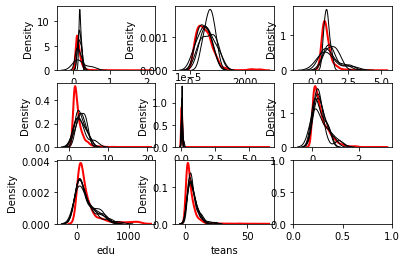

In [13]:
kernel3 = mf.MultipleImputedKernel(
    data0,
    save_all_iterations= True,
    save_models=1,
    datasets = 5,
    random_state=0,
    mean_match_candidates = 5
)
kernel3.mice(iterations =3 ,n_jobs = -1)
kernel3.plot_imputed_distributions()


In [14]:
kernel3.complete_data(0)

,iu,gov,fdi,pop,gdp,teans,edu,m
0,1.717397,0.200596,0.586047,683.820000,32061.0,7.354044,392.393064,8.877473
1,0.893475,0.127500,0.667270,776.850000,26532.0,12.457440,264.808855,3.047617
2,0.789845,0.058223,0.184434,574.530000,15188.0,4.540928,204.658927,2.401926
3,0.540580,0.056354,0.155930,524.260000,18387.0,4.119951,112.510619,1.385023
4,1.268028,0.078569,0.399013,363.270000,14236.0,6.506849,203.307841,2.039496
...,...,...,...,...,...,...,...,...
2239,0.869386,0.183946,0.045645,480.930427,50338.0,1.100218,277.333333,2.349093
2240,0.605447,0.157473,0.049856,208.643815,59050.0,3.666667,133.023810,2.237031
2241,1.212537,0.255403,0.004688,403.532816,34481.0,3.135849,31.154717,2.094901
2242,1.510326,0.348140,0.112789,203.503349,44794.0,7.075949,53.645570,2.369494


In [15]:
datasets = []
df = []
for i in range(kernel3.dataset_count()) :
    datasets.append(kernel3.complete_data(i))
    dd = pd.DataFrame((datasets[i].mean()-data0.mean())/data0.mean()*100 )
    df.append(dd)


Text(0.5, 0, '')

C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 34917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25454 missing from c

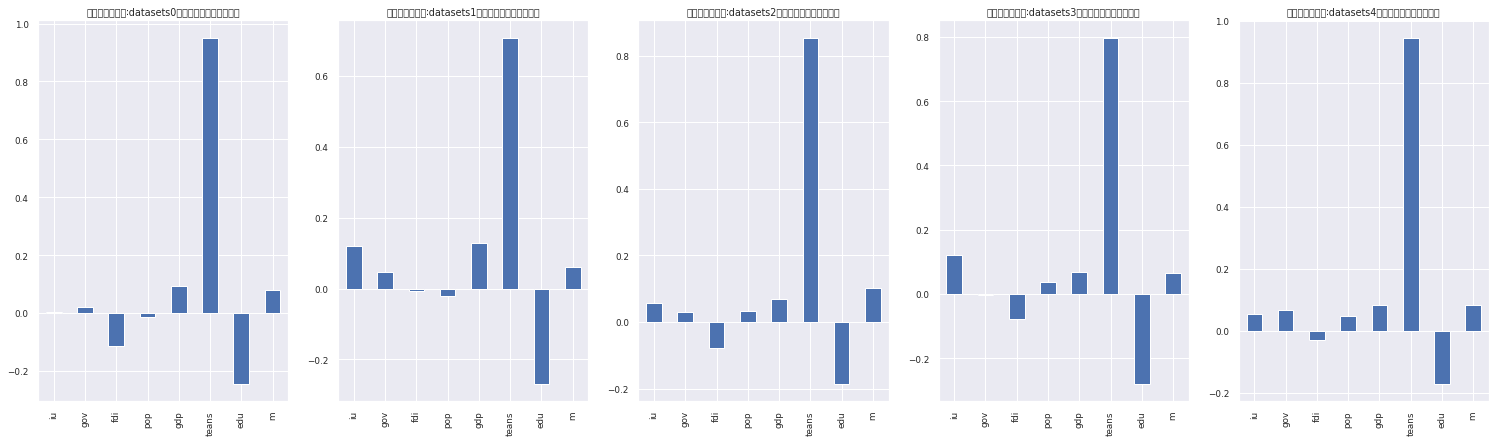

In [17]:
sns.set ( font= ' Arial Unicode Ms ' ,font_scale=0.8 )
mth_name = ["datasets0" ,"datasets1" ,"datasets2","datasets3","datasets4" ]
plt.figure( figsize=( 26,7))
i = 0
for j in range(len(datasets)):
    i += 1
    ax =plt.subplot (1,5,i)
    ax = ((datasets[j].mean()-data0.mean())/data0.mean()*100).plot(
        kind= 'bar' ,
        title='多重填补数据集∶{}处理缺失值后均值变化率'.format(mth_name[j]))
ax.set_xlabel( '' ,fontsize = 10)
#ax.set_ylabe1 ( '%change ' )


In [18]:
data_full=data0.copy()
data_full.isnull().sum()

iu        6
gov       4
fdi      12
pop       4
gdp       7
teans    60
edu      29
m         6
dtype: int64

In [19]:
df1= pd.concat([df[0],df[1],df[2],df[3],df[4]],axis=1)
df1.columns = ['0', '1', '2', '3', '4']
df1

,0,1,2,3,4
iu,0.003057,0.120872,0.058573,0.121056,0.055737
gov,0.020008,0.046488,0.028933,-0.003001,0.066507
fdi,-0.114585,-0.007964,-0.079574,-0.078901,-0.028147
pop,-0.013105,-0.019812,0.032484,0.036459,0.048312
gdp,0.091794,0.129407,0.068318,0.067764,0.082587
teans,0.951807,0.707788,0.855073,0.797516,0.946222
edu,-0.243859,-0.267793,-0.184933,-0.278414,-0.169555
m,0.078331,0.060514,0.101419,0.064511,0.085022


In [21]:
data_full.loc[:,'iu']=datasets[1]['iu']
data_full.loc[:,'gov']=datasets[3]['gov']
data_full.loc[:,'fdi']=datasets[1]['fdi']
data_full.loc[:,'pop']=datasets[0]['pop']
data_full.loc[:,'gdp']=datasets[3]['gdp']
data_full.loc[:,'teans']=datasets[1]['teans']
data_full.loc[:,'edu']=datasets[4]['edu']
data_full.loc[:,'m']=datasets[1]['m']

In [22]:
data_full.isnull().sum()

iu       0
gov      0
fdi      0
pop      0
gdp      0
teans    0
edu      0
m        0
dtype: int64

In [23]:
(data_full.mean()-data0.mean())/data0.mean()*100

iu       0.120872
gov     -0.003001
fdi     -0.007964
pop     -0.013105
gdp      0.067764
teans    0.707788
edu     -0.169555
m        0.060514
dtype: float64

In [25]:
data_full.to_excel('D:\\学校\\毕业论文\\数据\\城市群\\miceforest多重插补.xlsx',index=False)